In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pim_tmr as pim
import matrices as mats
from metrics import pearson_statistics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
N = 100
n = 10
m = 2*n
s = 0.5

names = ['random', 'complex_random', 'diag_random', 'diag_complex_random', 
         'sparse_random', 'sparse_complex_random',
         'random_toeplitz', 'random_complex_toeplitz', 'random_complex_full_toeplitz',
         'sparse_random_toeplitz', 'sparse_random_complex_toeplitz', 'sparse_random_complex_full_toeplitz']

matrices = [
    mats.random(n,m), mats.complex_random(n,m), mats.diag_random(n), mats.diag_complex_random(n),
    mats.sparse_random(n,m,s), mats.sparse_complex_random(n,m,s),
    mats.random_toeplitz(n,m), mats.random_complex_toeplitz(n,m), mats.random_complex_full_toeplitz(n,m),
    mats.sparse_random_toeplitz(n,m,s), mats.sparse_random_complex_toeplitz(n,m,s), mats.sparse_random_complex_full_toeplitz(n,m,s),
]

In [13]:
A = mats.complex_random(N,n)

for i in range(len(names)):
    X = matrices[i]
    B = np.abs(np.dot(A, X))
    X_est = pim.pim_tmr(A, B, tol=1e-10, tol_stag=1e-3, max_stag=10, disable_outputs=True)
    p = pearson_statistics(X, X_est, 100, print_result=False)
    print(f"{names[i]}")
    print(f"\tPearson: average = {p[0]*100:.5f}%, std = {p[1]*100:.5f}%")

random
	Pearson: average = 99.99997%, std = 0.00003%
complex_random
	Pearson: average = 99.99996%, std = 0.00002%
diag_random
	Pearson: average = 100.00000%, std = 0.00001%
diag_complex_random
	Pearson: average = 100.00000%, std = 0.00000%
sparse_random
	Pearson: average = 100.00000%, std = 0.00001%
sparse_complex_random
	Pearson: average = 100.00000%, std = 0.00001%
random_toeplitz
	Pearson: average = 99.99978%, std = 0.00017%
random_complex_toeplitz
	Pearson: average = 100.00000%, std = 0.00001%
random_complex_full_toeplitz
	Pearson: average = 99.99998%, std = 0.00001%
sparse_random_toeplitz
	Pearson: average = 99.99996%, std = 0.00004%
sparse_random_complex_toeplitz
	Pearson: average = 100.00000%, std = 0.00000%
sparse_random_complex_full_toeplitz
	Pearson: average = 99.99994%, std = 0.00002%


random
complex_random
diag_random
diag_complex_random
sparse_random
sparse_complex_random
random_toeplitz
random_complex_toeplitz
random_complex_full_toeplitz
sparse_random_toeplitz
sparse_random_complex_toeplitz
sparse_random_complex_full_toeplitz


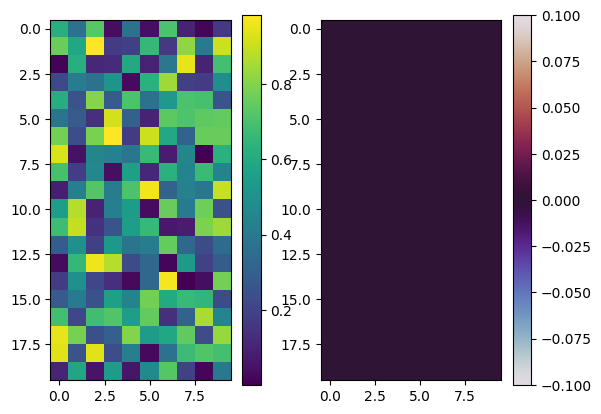

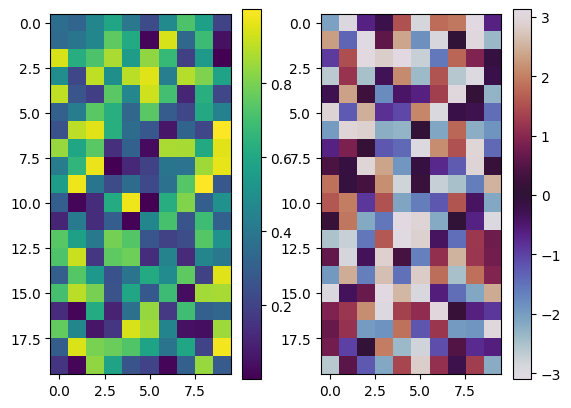

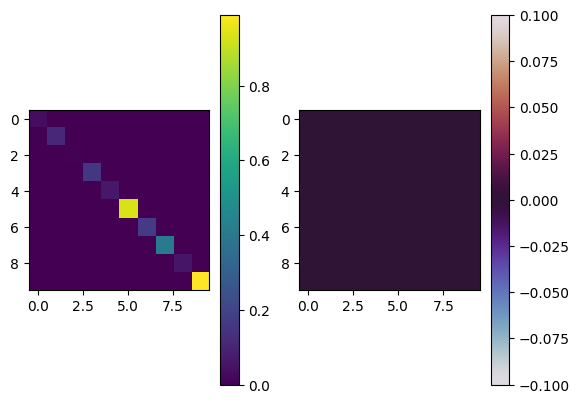

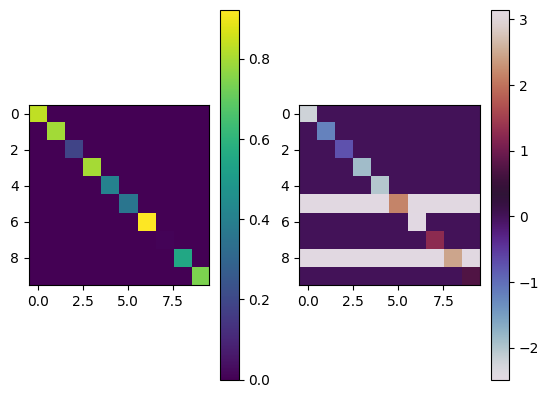

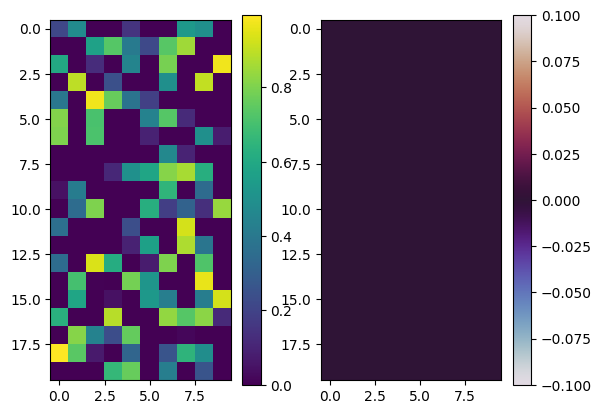

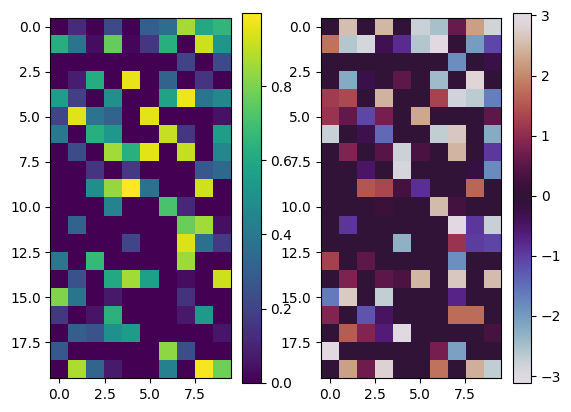

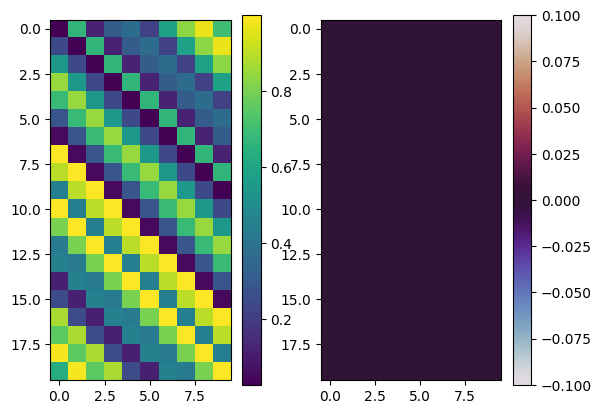

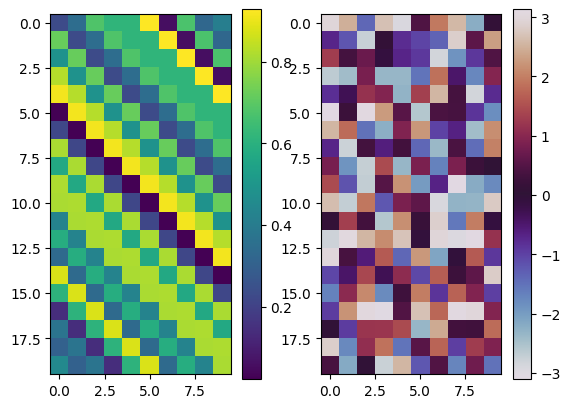

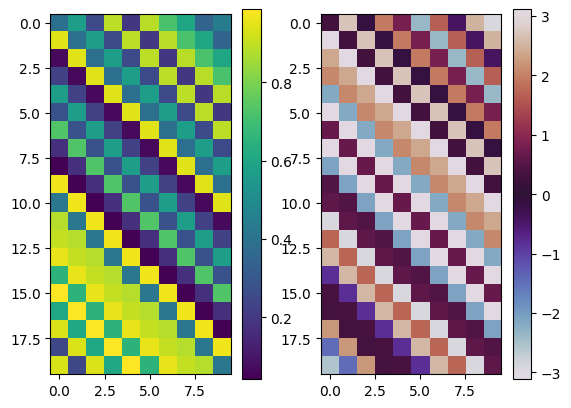

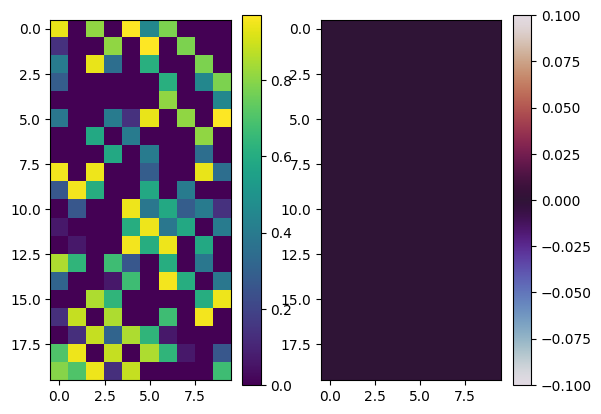

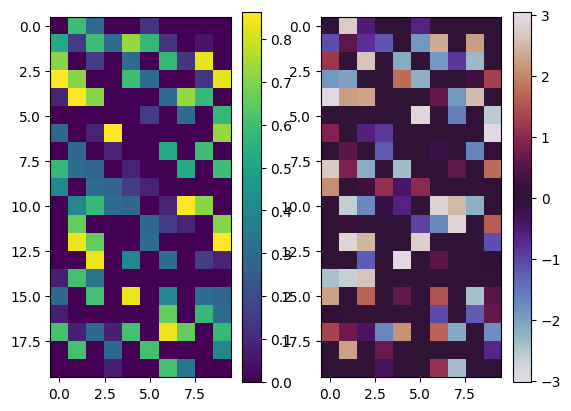

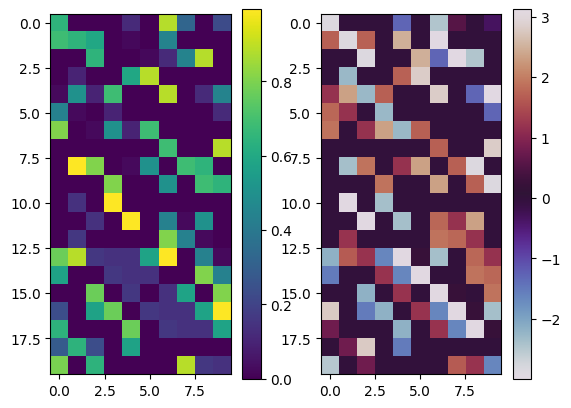

In [14]:
A = mats.complex_random(N,n)

for i in range(len(names)):
    print(f"{names[i]}")
    mats.plot_matrix(matrices[i])